# __Time Series Analysis__  
## Krzysztof Stawarz  
### Krakow, 24.11.2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

sns.set_style(style="darkgrid")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("zamowienia.csv", delimiter=';', index_col=1)
df.index = pd.to_datetime(df.index)
df.head()

,price
date_time,
2022-11-01 11:26:00,519.98
2022-11-03 00:03:00,109.98
2022-11-03 09:13:00,299.99
2022-11-03 18:45:00,119.98
2022-11-05 16:14:00,109.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2022-11-01 11:26:00 to 2023-10-31 11:04:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   458 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [4]:
df.describe()

,price
count,458.000000
mean,315.438275
std,446.469081
min,24.980000
25%,109.990000
50%,167.485000
75%,309.960000
max,3249.930000


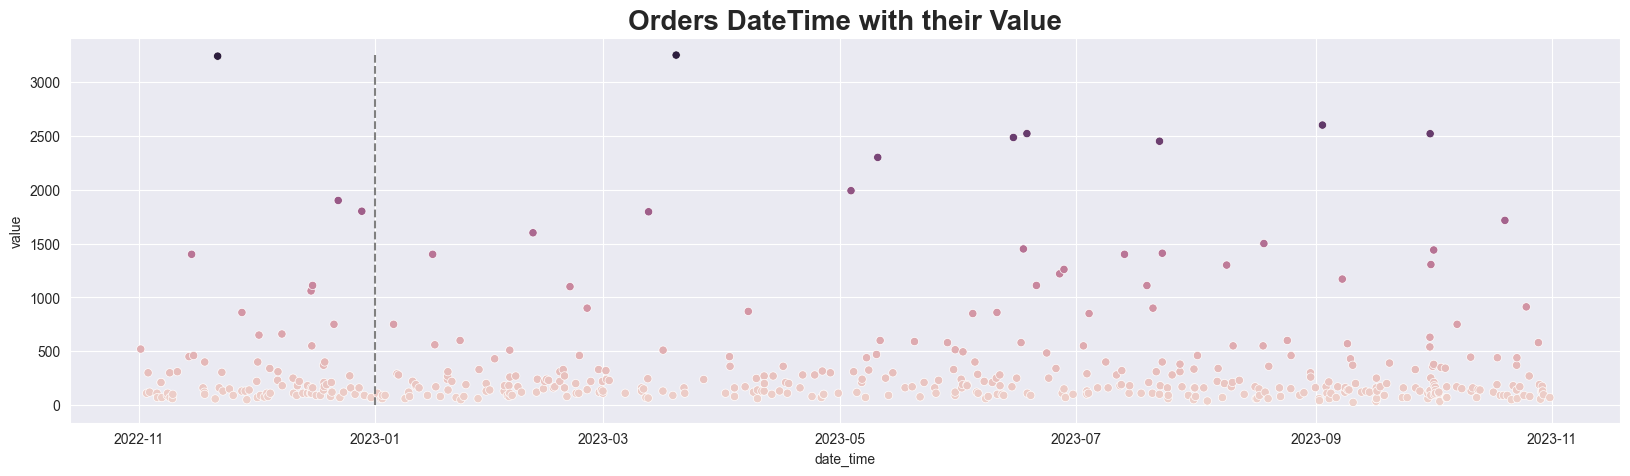

In [5]:
plt.figure(figsize=(20, 5))
scatter = sns.scatterplot(x=df.index, y=df["price"], legend=False, hue=df['price'])
scatter.set_ylabel("value")
scatter.set_title("Orders DateTime with their Value", weight="bold", fontsize=20)
plt.vlines(x=pd.to_datetime("2023-01-01"), ymin=0, ymax=int(max(df["price"])), color="grey", linestyles="dashed")
plt.show()

___
# __Sum__

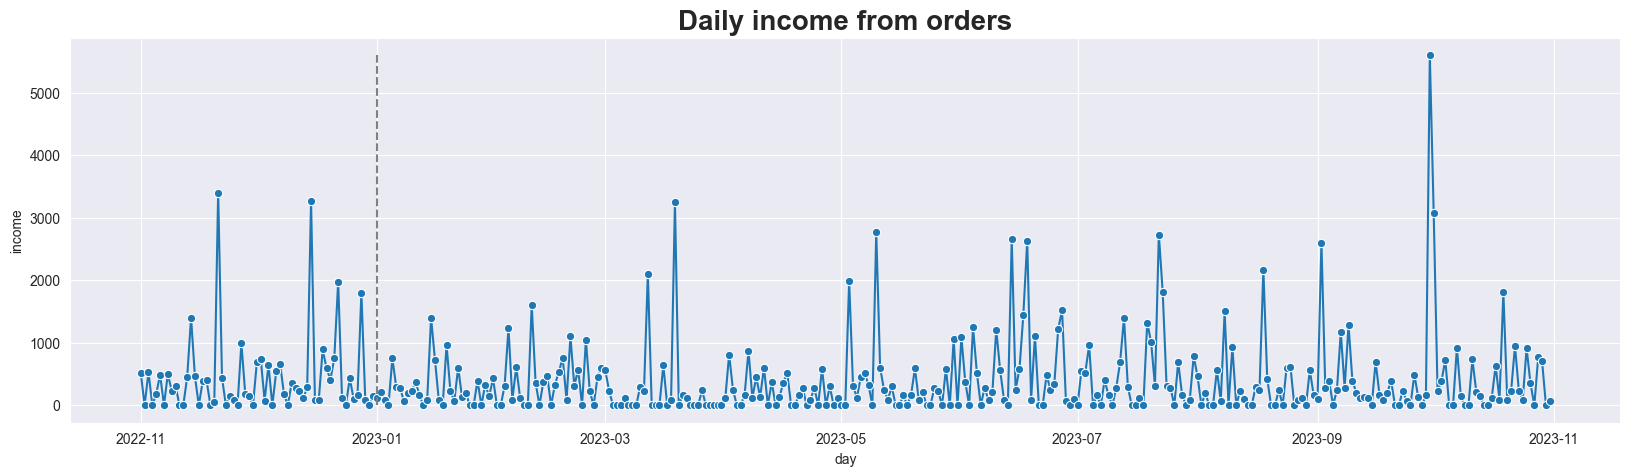

In [6]:
day_sum = df.resample('D').sum()

plt.figure(figsize=(20,5))
sns.lineplot(data=day_sum, legend=False, marker='o')
plt.ylabel("income")
plt.xlabel("day")
plt.title("Daily income from orders", weight="bold", fontsize=20)
plt.vlines(x=pd.to_datetime("2023-01-01"), ymin=0, ymax=int(max(day_sum["price"])), color="grey", linestyles="dashed")
plt.show()

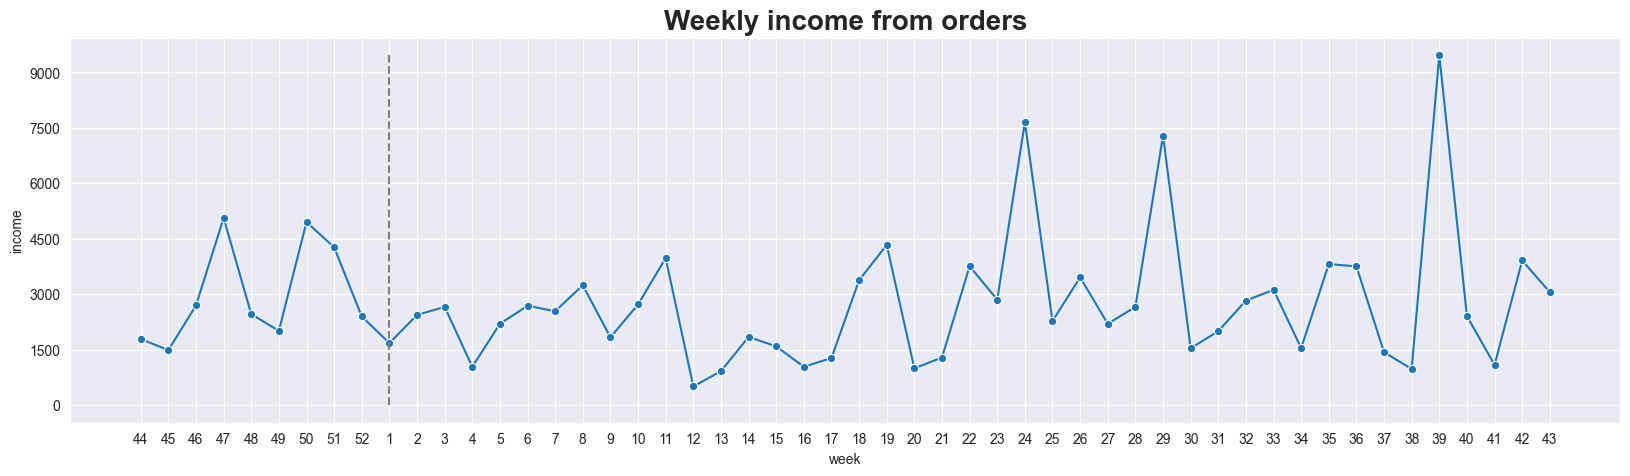

In [7]:
week_sum = data=df.resample('W').sum()  # get week sums of sales
week_sum.index = pd.DataFrame(week_sum.index)["date_time"].dt.isocalendar().week  # get week of the year number
week_sum.iloc[0] += week_sum.iloc[-1]  # last week is divided so add first and last row 
week_sum = week_sum.iloc[:-1]  # drop unnecessary last row
week_sum.index = week_sum.index.astype(str)  #  cast to str so x-axis wont be sorted

plt.figure(figsize=(20,5))
sns.lineplot(x=week_sum.index, y=week_sum["price"], marker='o')
plt.ylabel("income")
plt.yticks(range(0, int(max(week_sum["price"])), 1500))
plt.title("Weekly income from orders", weight="bold", fontsize=20)
plt.vlines(x="1", ymin=0, ymax=int(max(week_sum["price"])), color="grey", linestyles="dashed")
plt.show()

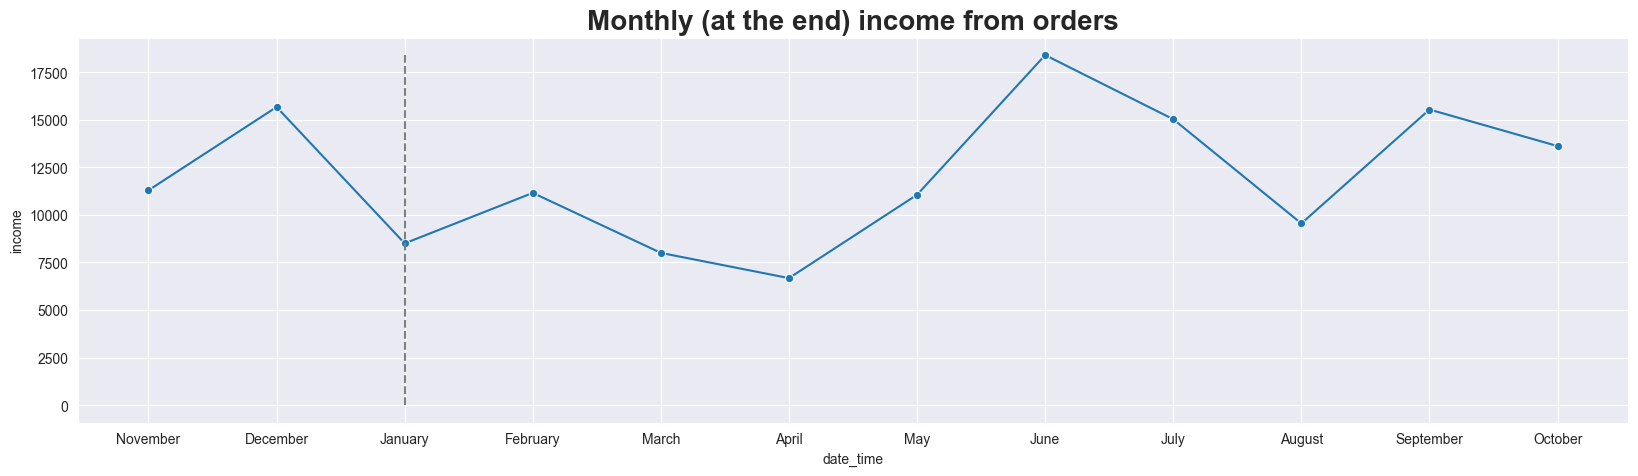

In [8]:
month_sum = df.resample('M').sum()
month_sum.index = pd.DataFrame(month_sum.index)["date_time"].dt.month_name()

plt.figure(figsize=(20,5))
sns.lineplot(data=month_sum, marker='o', legend=False)
plt.ylabel("income")
plt.xticks(month_sum.index)
plt.yticks(range(0, int(max(month_sum["price"])), 2500))
plt.title("Monthly (at the end) income from orders", weight="bold", fontsize=20)
plt.vlines(x="January", ymin=0, ymax=int(max(month_sum["price"])), color="grey", linestyles="dashed")
plt.show()

___
# __Count__

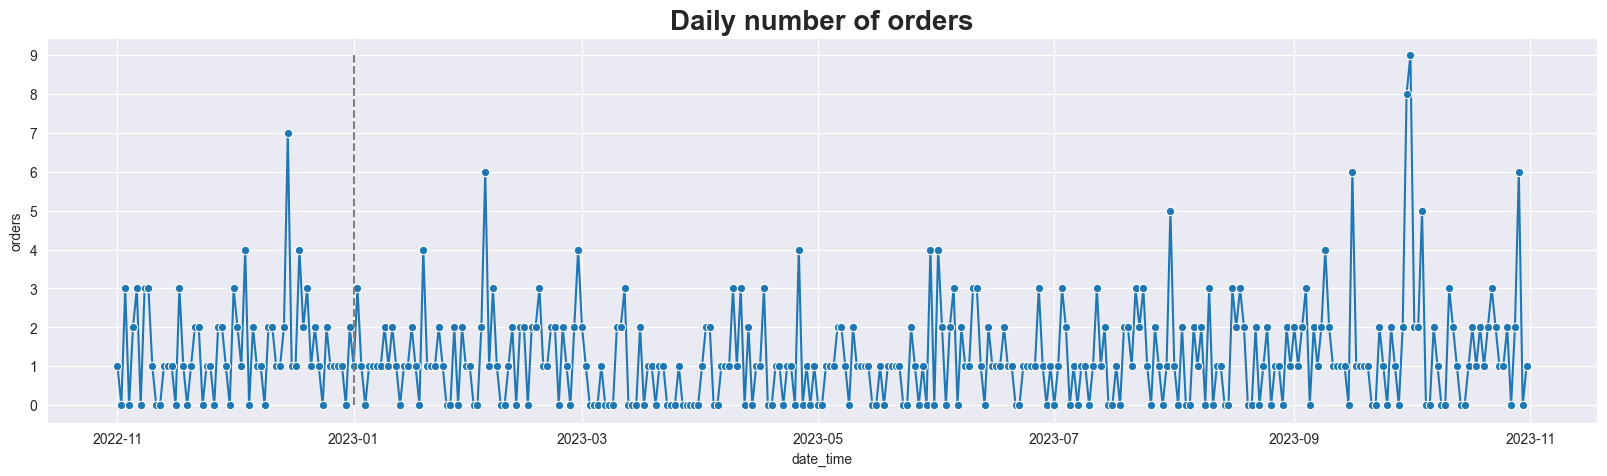

In [9]:
day_count = df.resample('D').count()

plt.figure(figsize=(20,5))
sns.lineplot(data=day_count, legend=False, marker='o')
plt.ylabel("orders")
plt.yticks(range(0, int(max(day_count["price"]))+1))
plt.title("Daily number of orders", weight="bold", fontsize=20)
plt.vlines(x=pd.to_datetime("2023-01-01"), ymin=0, ymax=int(max(day_count["price"])), color="grey", linestyles="dashed")
plt.show()

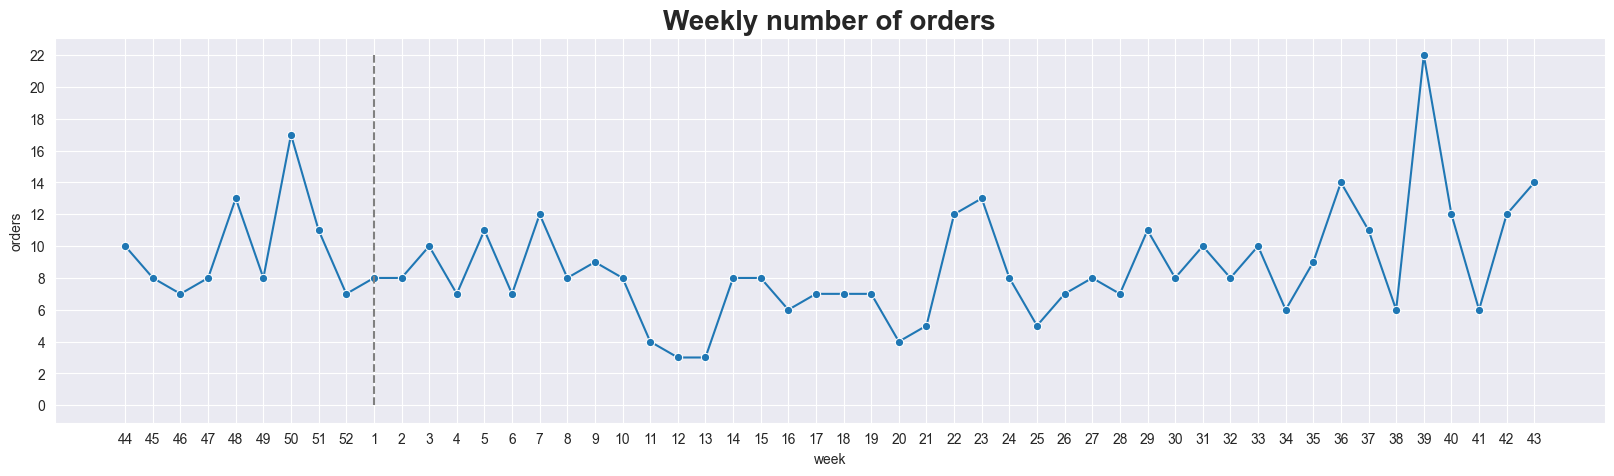

In [10]:
week_count = data=df.resample('W').count()  # get week sums of sales
week_count.index = pd.DataFrame(week_count.index)["date_time"].dt.isocalendar().week  # get week of the year number
week_count.iloc[0] += week_count.iloc[-1]  # last week is divided so add first and last row 
week_count = week_count.iloc[:-1]  # drop unnecessary last row
week_count.index = week_count.index.astype(str)  #  cast to str so x-axis wont be sorted

plt.figure(figsize=(20,5))
sns.lineplot(data=week_count, legend=False, marker='o')
plt.ylabel("orders")
plt.yticks(range(0, int(max(week_count["price"])+3), 2))
plt.title("Weekly number of orders", weight="bold", fontsize=20)
plt.vlines(x="1", ymin=0, ymax=int(max(week_count["price"])), color="grey", linestyles="dashed")
plt.show()

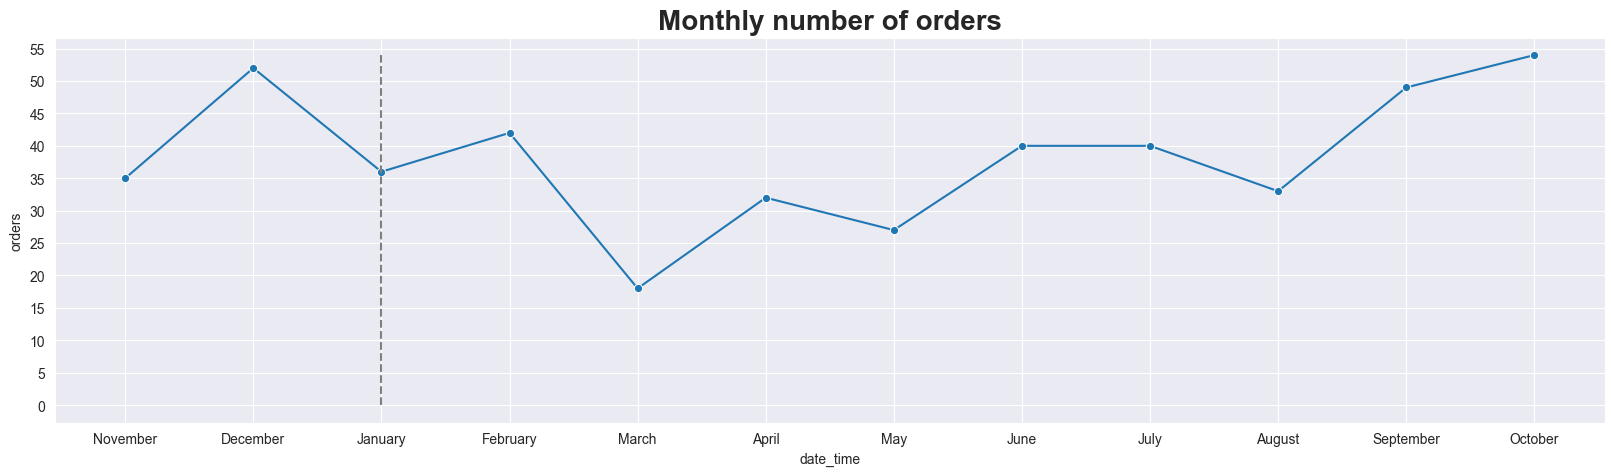

In [11]:
month_count = df.resample('M').count()
month_count.index = pd.DataFrame(month_count.index)["date_time"].dt.month_name()

plt.figure(figsize=(20,5))
sns.lineplot(data=month_count, legend=False, marker='o')
plt.ylabel("orders")
plt.yticks(range(0, int(max(month_count["price"]))+5, 5))
plt.xticks(month_count.index)
plt.title("Monthly number of orders", weight="bold", fontsize=20)
plt.vlines(x="January", ymin=0, ymax=int(max(month_count["price"])), color="grey", linestyles="dashed")
plt.show()

___
# __Decomposition__

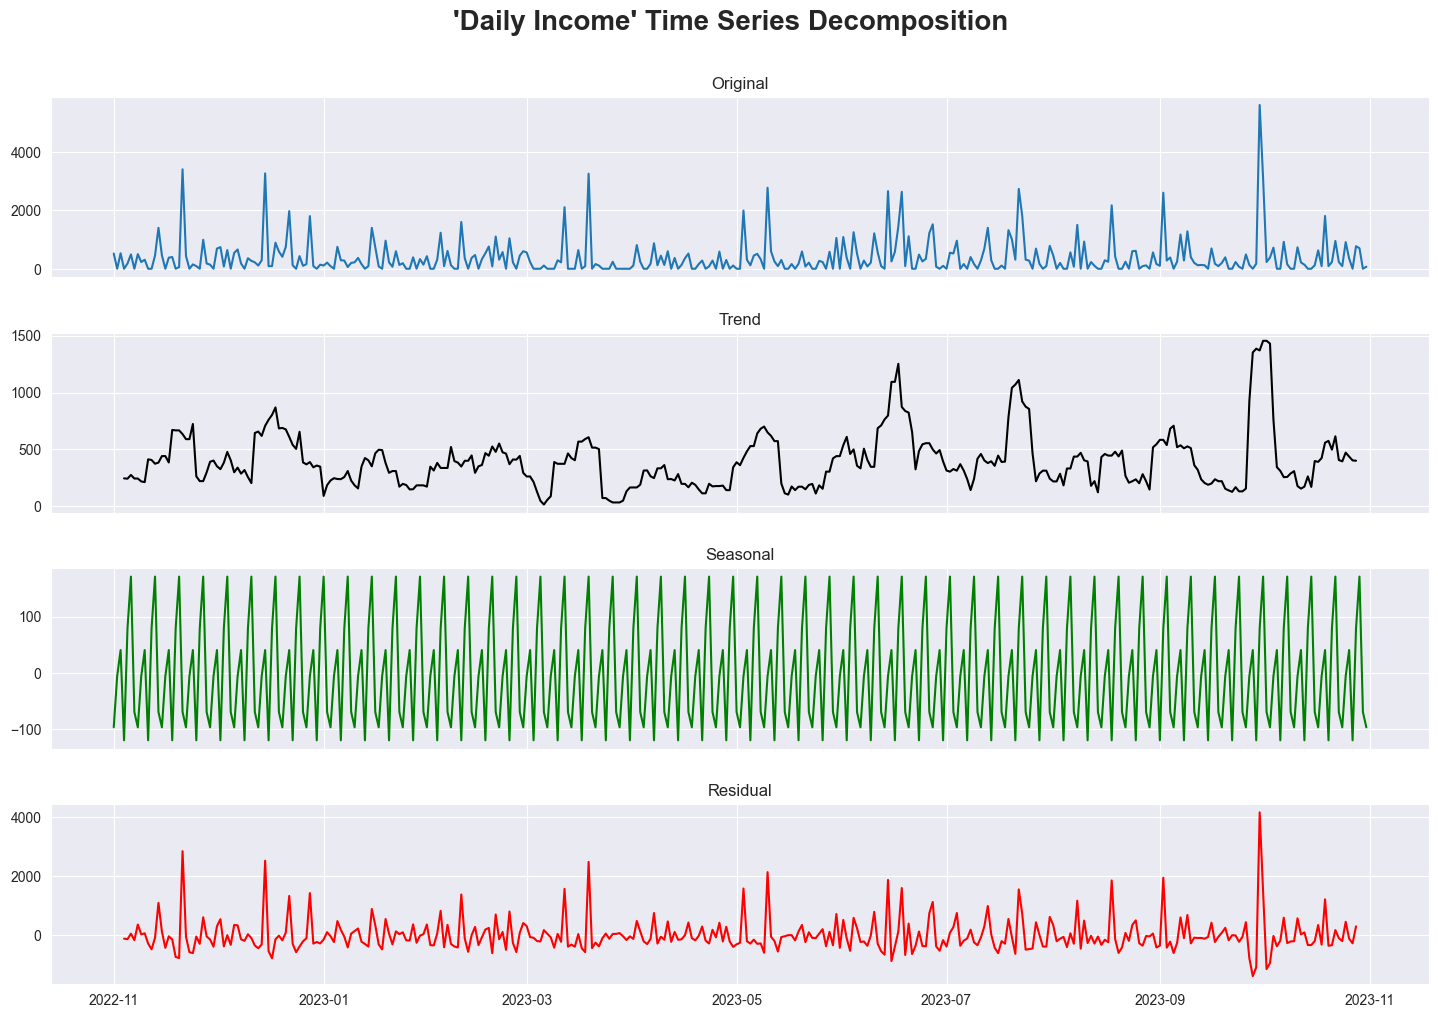

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

model = seasonal_decompose(day_sum, model="additive")

estimated_trend = model.trend
estimated_seasonal = model.seasonal
estimated_residual = model.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout(pad=3.)

fig.suptitle("'Daily Income' Time Series Decomposition", weight="bold", fontsize=20, y=1.04)

axes[0].plot(day_sum)
axes[0].set_title("Original")

axes[1].plot(estimated_trend, 'k')
axes[1].set_title("Trend")

axes[2].plot(estimated_seasonal, 'g')
axes[2].set_title("Seasonal")

axes[3].plot(estimated_residual, 'r')
axes[3].set_title("Residual")

plt.show()

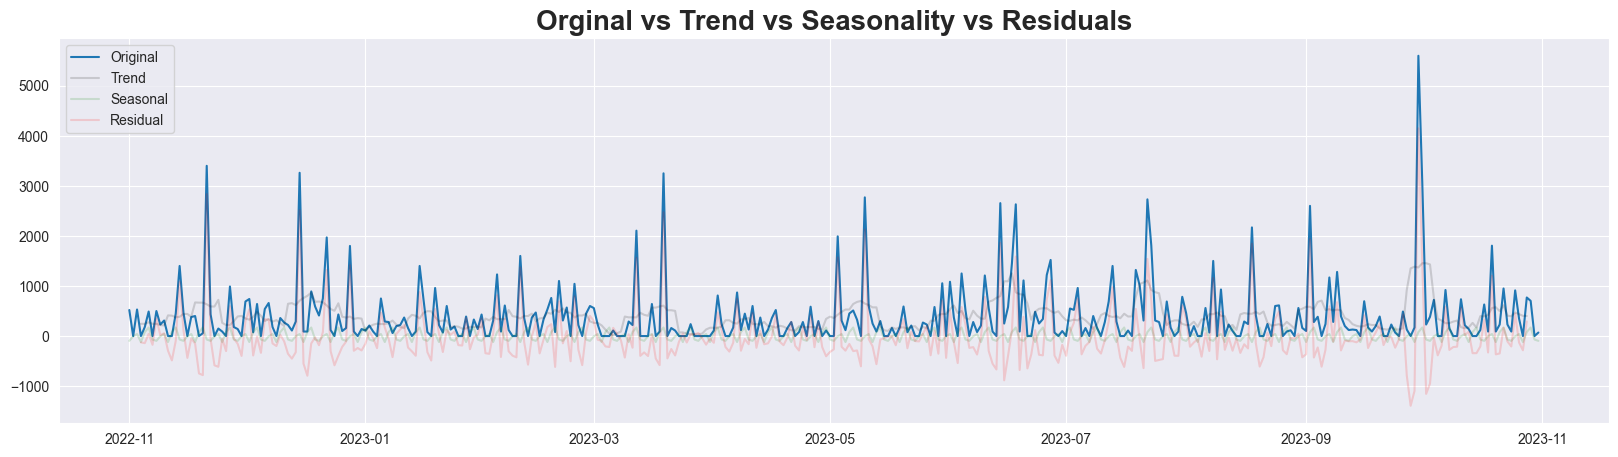

In [13]:
plt.figure(figsize=(20,5))
plt.plot(day_sum, label="Original")
plt.plot(estimated_trend, 'k', alpha=0.15, label="Trend")
plt.plot(estimated_seasonal, 'g', alpha=0.15, label="Seasonal")
plt.plot(estimated_residual, 'r', alpha=0.15, label="Residual")
plt.title("Orginal vs Trend vs Seasonality vs Residuals", weight="bold", fontsize=20)
plt.legend(loc="upper left")
plt.show()

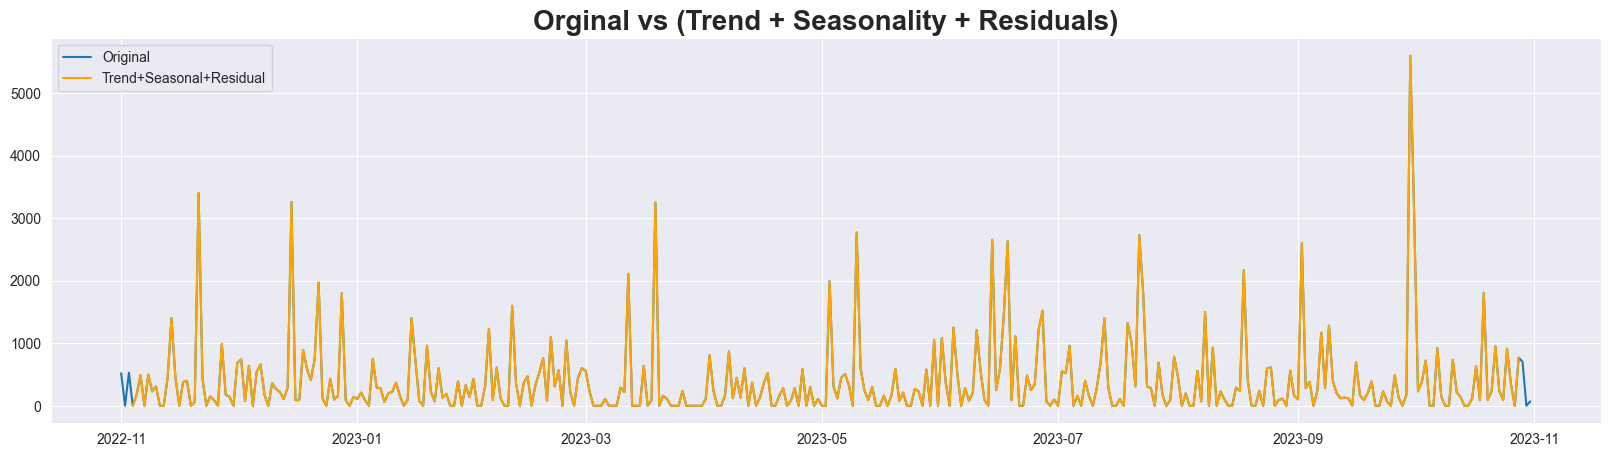

In [14]:
plt.figure(figsize=(20,5))
plt.plot(day_sum, label="Original")
plt.plot(estimated_trend+estimated_seasonal+estimated_residual, 'orange', label="Trend+Seasonal+Residual")
plt.title("Orginal vs (Trend + Seasonality + Residuals)", weight="bold", fontsize=20)
plt.legend(loc="upper left")
plt.show()

___
# __ACF i PACF__

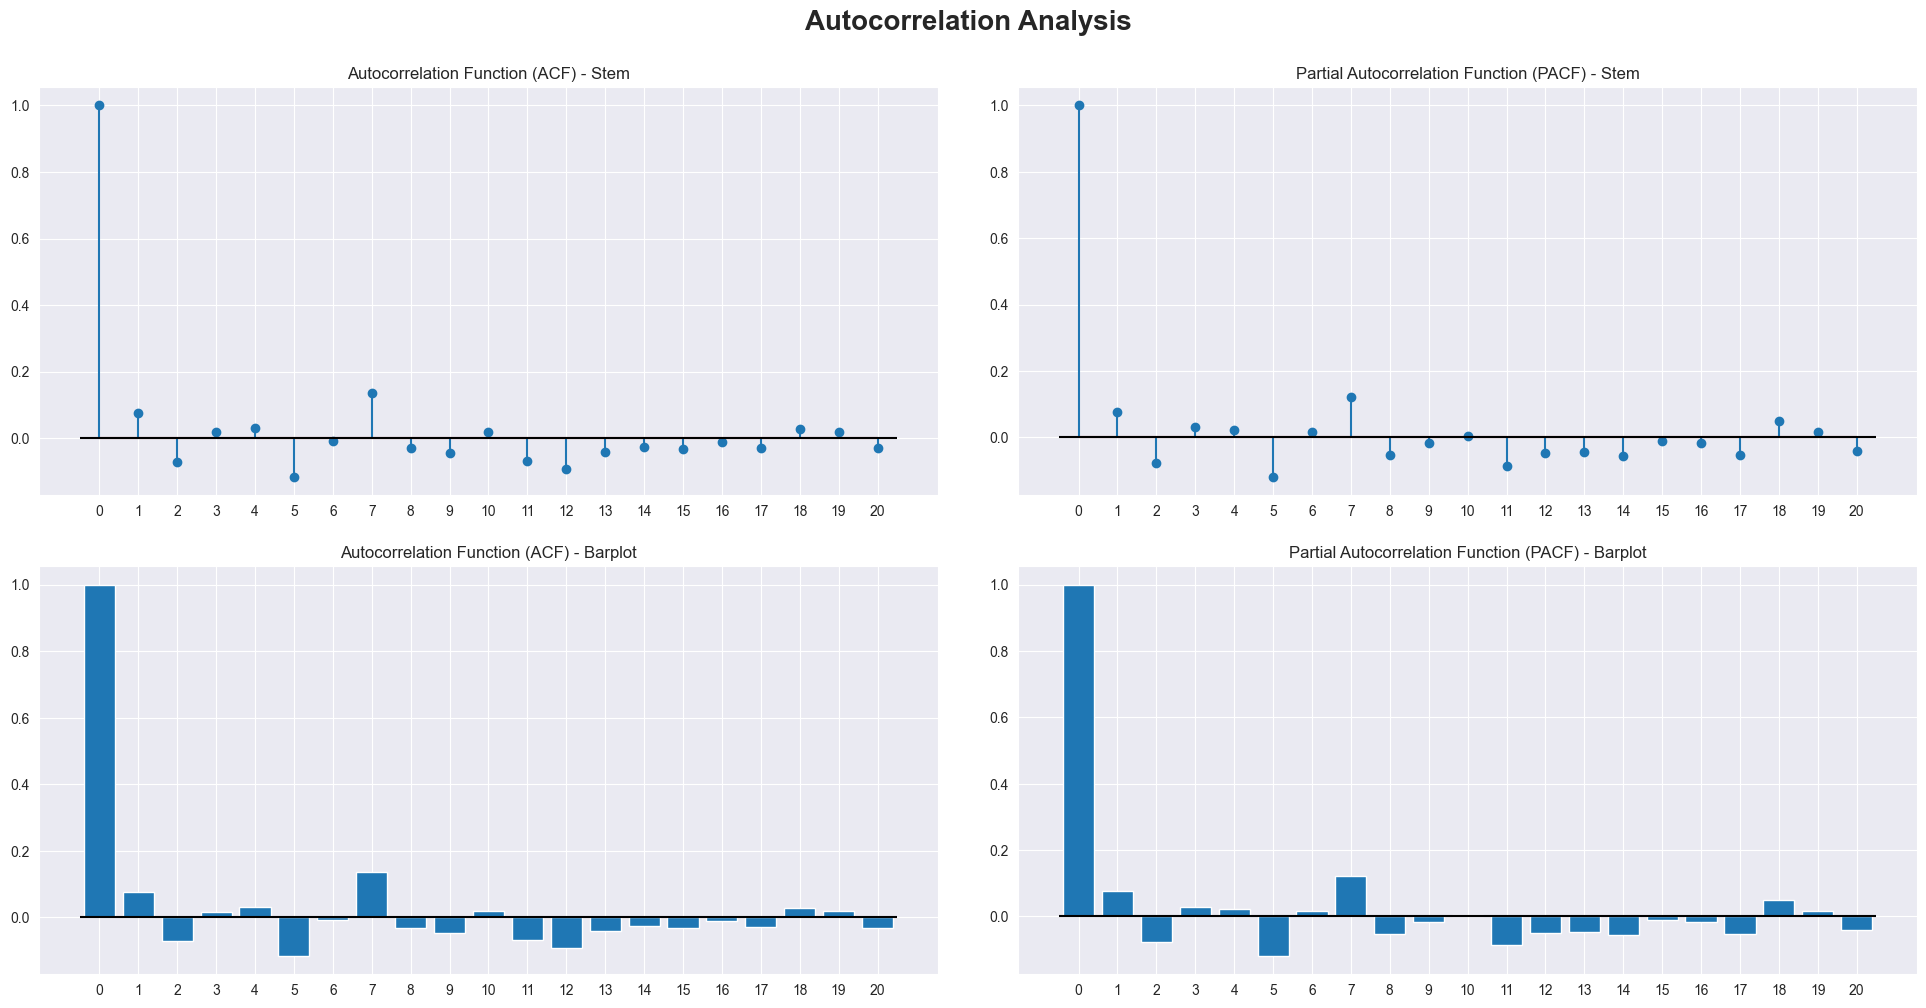

In [58]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(day_sum, nlags=20)
lag_pacf = pacf(day_sum, nlags=20, method='ols')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.tight_layout(pad=3)
fig.suptitle("Autocorrelation Analysis", weight="bold", fontsize=20, y=1.03)

axes[0, 0].stem(range(0, 21), lag_acf)
axes[0, 0].hlines(y=0., xmin=-.5, xmax=20.5, color="k")
axes[0, 0].set_xticks(range(0, 21))
axes[0, 0].set_title("Autocorrelation Function (ACF) - Stem")

axes[0, 1].stem(range(0, 21), lag_pacf)
axes[0, 1].hlines(y=0., xmin=-.5, xmax=20.5, color="k")
axes[0, 1].set_xticks(range(0, 21))
axes[0, 1].set_title("Partial Autocorrelation Function (PACF) - Stem")

axes[1, 0].bar(range(0, 21), lag_acf)
axes[1, 0].hlines(y=0., xmin=-.5, xmax=20.5, color="k")
axes[1, 0].set_xticks(range(0, 21))
axes[1, 0].set_title("Autocorrelation Function (ACF) - Barplot")

axes[1, 1].bar(range(0, 21), lag_pacf)
axes[1, 1].hlines(y=0., xmin=-.5, xmax=20.5, color="k")
axes[1, 1].set_xticks(range(0, 21))
axes[1, 1].set_title("Partial Autocorrelation Function (PACF) - Barplot")

plt.show()

___
# __1. Model AR (AutoRegressive)__